In [ ]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Setup Data

In [ ]:
from pathlib import Path
data_path = Path('/content')
# Correcting the img_path definition - removed the extra 'MyDrive'
img_path = data_path / 'PlantVillage'
img_path, data_path

(PosixPath('/content/PlantVillage'), PosixPath('/content'))

In [ ]:
!cp -r "/content/drive/MyDrive/PlantVillage" "/content/PlantVillage"

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returninig its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [ ]:
walk_through_dir(img_path)

There are 2 directories and 1 images in /content/PlantVillage
There are 38 directories and 1 images in /content/PlantVillage/val
There are 0 directories and 55 images in /content/PlantVillage/val/Apple___Cedar_apple_rust
There are 0 directories and 200 images in /content/PlantVillage/val/Potato___Late_blight
There are 0 directories and 1018 images in /content/PlantVillage/val/Soybean___healthy
There are 0 directories and 210 images in /content/PlantVillage/val/Cherry_(including_sour)___Powdery_mildew
There are 0 directories and 31 images in /content/PlantVillage/val/Potato___healthy
There are 0 directories and 92 images in /content/PlantVillage/val/Strawberry___healthy
There are 0 directories and 354 images in /content/PlantVillage/val/Tomato___Septoria_leaf_spot
There are 0 directories and 281 images in /content/PlantVillage/val/Tomato___Target_Spot
There are 0 directories and 125 images in /content/PlantVillage/val/Apple___Black_rot
There are 0 directories and 72 images in /content/P

In [ ]:
train_dir = img_path / 'train'
test_dir = img_path / 'val'

train_dir, test_dir

(PosixPath('/content/PlantVillage/train'),
 PosixPath('/content/PlantVillage/val'))

Random image path: /content/PlantVillage/train/Grape___Esca_(Black_Measles)/03f815cb-cdcd-4486-a142-f2ac59a4bf48___FAM_B.Msls 4315.JPG
Image class: Grape___Esca_(Black_Measles)
Image height: 256
Image width: 256


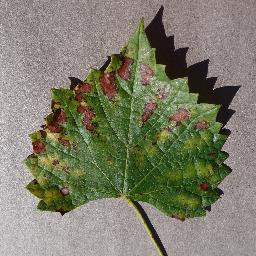

In [ ]:
import random
from PIL import Image
import os

image_path_list = list(train_dir.glob('*/*.JPG')) + list(test_dir.glob('*/*.JPG'))


# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(f'Random image path: {random_image_path}')


# 3. Get image class from path name
# Assuming the class name is the directory name one level above the image file
img_class = Path(random_image_path).parent.stem
print(f'Image class: {img_class}')

# 4. Open image
image = Image.open(random_image_path)

# 5. Print metadata
print(f'Image height: {image.height}')
print(f'Image width: {image.width}')
image

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

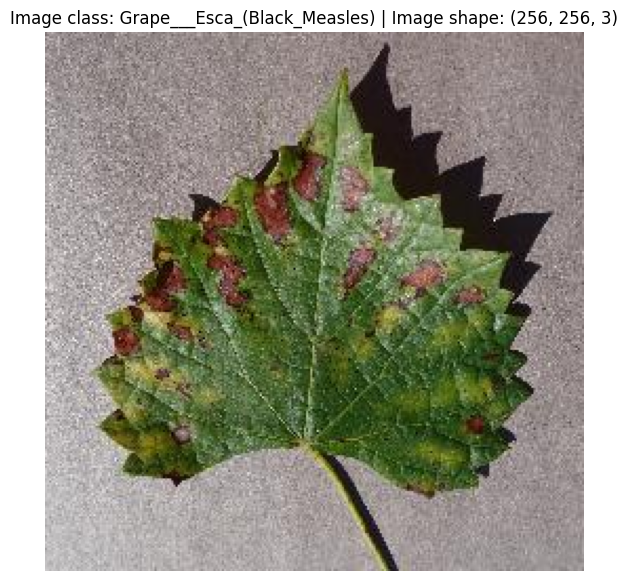

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Turn image into array
img_as_array = np.array(image)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {img_class} | Image shape: {img_as_array.shape}')
plt.axis(False)

## 2. Transform data
dataset -> dataloader (tensor)

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
train_data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
  ])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
train_data_transform(image)

tensor([[[0.5333, 0.6392, 0.6706,  ..., 0.6078, 0.5686, 0.4863],
         [0.5529, 0.5961, 0.6078,  ..., 0.5686, 0.5412, 0.5137],
         [0.6392, 0.6941, 0.6235,  ..., 0.5216, 0.5059, 0.5294],
         ...,
         [0.7255, 0.7294, 0.7176,  ..., 0.0000, 0.0000, 0.0000],
         [0.7176, 0.7333, 0.7451,  ..., 0.0000, 0.0000, 0.0000],
         [0.7176, 0.7490, 0.7608,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.4941, 0.6000, 0.6314,  ..., 0.5529, 0.5137, 0.4314],
         [0.5137, 0.5569, 0.5686,  ..., 0.5137, 0.4863, 0.4588],
         [0.6000, 0.6549, 0.5843,  ..., 0.4667, 0.4510, 0.4745],
         ...,
         [0.7176, 0.7216, 0.7098,  ..., 0.0000, 0.0000, 0.0000],
         [0.7098, 0.7255, 0.7373,  ..., 0.0000, 0.0000, 0.0000],
         [0.7098, 0.7412, 0.7529,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.4980, 0.6039, 0.6353,  ..., 0.5490, 0.5098, 0.4275],
         [0.5176, 0.5608, 0.5725,  ..., 0.5098, 0.4824, 0.4549],
         [0.6039, 0.6588, 0.5882,  ..., 0.4627, 0.4471, 0.

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_data_transform,
                                 target_transform=None)

print(f'Train data: {train_data}')
print(f'Test data: {test_data}')

Train data: Dataset ImageFolder
    Number of datapoints: 43780
    Root location: /content/PlantVillage/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
Test data: Dataset ImageFolder
    Number of datapoints: 11482
    Root location: /content/PlantVillage/val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
# Get class names
class_names = train_data.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
len(class_names)

38

In [ ]:
# Check lengths of datasets
len(train_data), len(test_data)

(43780, 11482)

In [ ]:
# Setup dataloader
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS
                             )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1369, 359)

In [ ]:
img, label = next(iter(train_dataloader))
print(f'Image shape:  {img.shape} -> [batch_size, color_channels, height, width]')
print(f'Label shape: {label.shape}')

Image shape:  torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 3. Create and instatiate Model

In [ ]:
class DiseaseClassfier(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
         nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=64,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=0
        ),
         nn.ReLU(),
         nn.Conv2d(
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(
            in_channels=128,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=0
        ),
         nn.ReLU(),
         nn.Conv2d(
            in_channels=128,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Linear(in_features=128, # need to multiply by something
        out_features=output_shape)
    )
  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(f'Shape of conv_block_1: {x.shape}')
    # x = self.conv_block_2(x)
    # print(f'Shape of conv_block_2: {x.shape}')
    # x = self.conv_block_3(x)
    # print(f'Shape of conv_block_3: {x.shape}')
    # x = self.classifier(x)
    # print(f'Shape of classifier: {x.shape}')
    # return x
    return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))

model_1 = DiseaseClassfier(input_shape=3,
                           output_shape=len(class_names)).to(device)
model_1

DiseaseClassfier(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=128, out_features=38, bias=Tr

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
model_1(image_batch.to(device))

tensor([[-0.0339,  0.0020,  0.0689,  ...,  0.0268, -0.0570, -0.0458],
        [-0.0332,  0.0022,  0.0681,  ...,  0.0278, -0.0550, -0.0459],
        [-0.0326,  0.0026,  0.0679,  ...,  0.0283, -0.0543, -0.0459],
        ...,
        [-0.0330,  0.0022,  0.0679,  ...,  0.0281, -0.0547, -0.0459],
        [-0.0330,  0.0021,  0.0679,  ...,  0.0283, -0.0549, -0.0458],
        [-0.0326,  0.0025,  0.0680,  ...,  0.0283, -0.0543, -0.0459]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
batch_size = 32
summary(model_1,
        input_size=(batch_size, 3, 96, 96))

Layer (type:depth-idx)                   Output Shape              Param #
DiseaseClassfier                         [32, 38]                  --
├─Sequential: 1-1                        [32, 64, 46, 46]          --
│    └─Conv2d: 2-1                       [32, 32, 94, 94]          896
│    └─ReLU: 2-2                         [32, 32, 94, 94]          --
│    └─Conv2d: 2-3                       [32, 64, 92, 92]          18,496
│    └─ReLU: 2-4                         [32, 64, 92, 92]          --
│    └─MaxPool2d: 2-5                    [32, 64, 46, 46]          --
├─Sequential: 1-2                        [32, 128, 21, 21]         --
│    └─Conv2d: 2-6                       [32, 64, 44, 44]          36,928
│    └─ReLU: 2-7                         [32, 64, 44, 44]          --
│    └─Conv2d: 2-8                       [32, 128, 42, 42]         73,856
│    └─ReLU: 2-9                         [32, 128, 42, 42]         --
│    └─MaxPool2d: 2-10                   [32, 128, 21, 21]         --
├─

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download...')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

## 4. Training/Testing

In [ ]:
from collections import Counter

targets = [int(t) for t in train_data.targets]

# Count number of samples per class
class_counts = Counter(targets)
num_classes = len(class_names)

# Compute weights = inverse frequency
class_weights = []
for i in range(num_classes):
    count = class_counts.get(i, 1)     # get count or default to 1
    class_weights.append(1.0 / count)  # guaranteed to be float

# Convert to tensor
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

print("Class weights:", class_weights)

Class weights: tensor([0.0020, 0.0020, 0.0045, 0.0008, 0.0008, 0.0012, 0.0015, 0.0024, 0.0010,
        0.0013, 0.0011, 0.0011, 0.0009, 0.0012, 0.0029, 0.0002, 0.0005, 0.0035,
        0.0013, 0.0008, 0.0012, 0.0012, 0.0083, 0.0034, 0.0002, 0.0007, 0.0011,
        0.0027, 0.0006, 0.0012, 0.0007, 0.0013, 0.0007, 0.0007, 0.0009, 0.0002,
        0.0033, 0.0008], device='cuda:0')


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

In [ ]:
from tqdm.auto import tqdm
import time
epochs = 5
results = {'train_loss': [],
           'train_acc': [],
           'test_loss': [],
           'test_acc': []}

start = time.time()
for epoch in tqdm(range(epochs)):
  model_1.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model_1(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    # Pass the raw model output (y_pred) to accuracy_fn
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  model_1.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device) # Added to move test data to device
      test_pred = model_1(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()
      # Pass the raw model output (test_pred) to accuracy_fn
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Test Loss, {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

  results['train_loss'].append(train_loss)
  results['train_acc'].append(train_acc)
  results['test_loss'].append(test_loss)
  results['test_acc'].append(test_acc)

print(f"num_workers= {NUM_WORKERS} → Avg time per batch: {(time.time() - start)/5:.4f} sec")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.2895, Train Acc: 91.21% | Test Loss, 0.1298, Test Acc: 96.09%
Epoch: 1 | Train Loss: 0.2974, Train Acc: 91.02% | Test Loss, 0.1351, Test Acc: 95.91%
Epoch: 2 | Train Loss: 0.2706, Train Acc: 91.78% | Test Loss, 0.1107, Test Acc: 96.30%
Epoch: 3 | Train Loss: 0.2847, Train Acc: 91.28% | Test Loss, 0.0728, Test Acc: 97.82%
Epoch: 4 | Train Loss: 0.2688, Train Acc: 91.85% | Test Loss, 0.0837, Test Acc: 97.38%
num_workers= 0 → Avg time per batch: 161.5214 sec


In [ ]:
results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

## 5. Plot Loss Curves

In [ ]:
def plot_loss_curves(results):
  """Plots testing curves of a results dictionary"""
  # Get loss values of results dict
  loss = results['train_loss']
  test_loss = results['test_loss']

  # get the acc values of results dict
  acc = results['train_acc']
  test_acc = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15, 7))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot acc
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label='acc')
  plt.plot(epochs, test_acc, label='test_acc')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

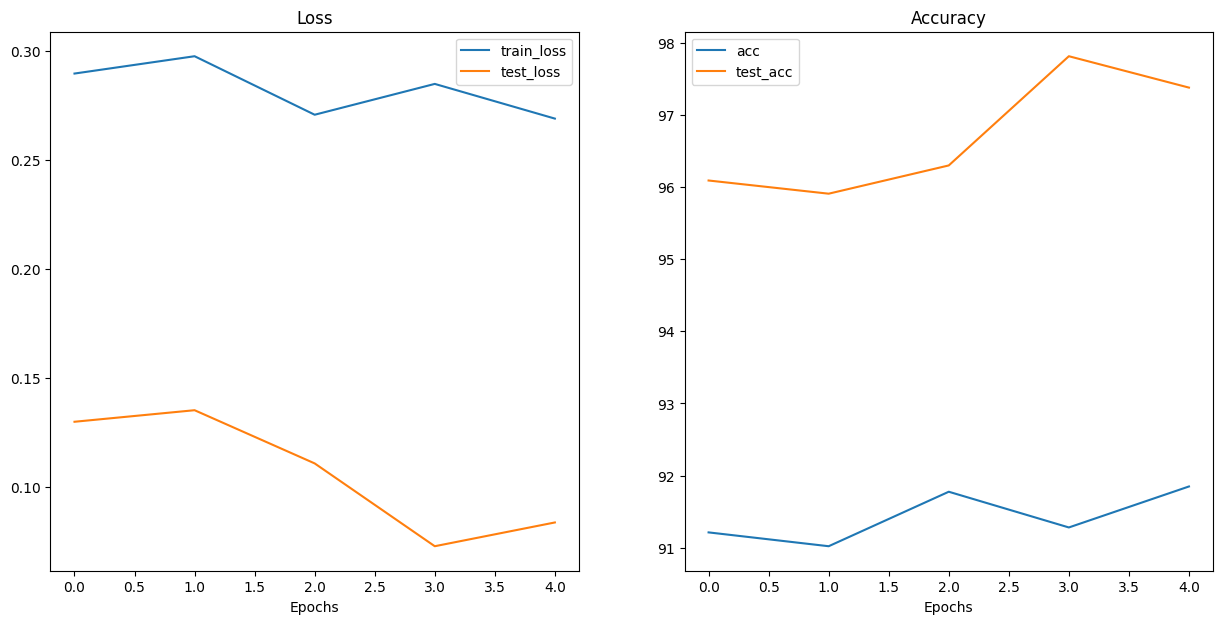

In [ ]:
plot_loss_curves(results)

## Multiclass F1 Score for futher prediction

In [ ]:
# 1. Make predictions with trained model
y=y_preds = []
model_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        X, y = X.to(device), y.to(device)
        y_logit = model_1(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/359 [00:00<?, ?it/s]

tensor([ 0,  0,  0,  ..., 37, 37, 37])

In [ ]:
# Collect all true labels
y_true_tensor = []
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Collecting true labels...'):
        y_true_tensor.append(y)

y_true_tensor = torch.cat(y_true_tensor)
y_true_tensor

tensor([ 0,  0,  0,  ..., 37, 37, 37])

In [ ]:
!pip install torcheval

In [ ]:
from torcheval.metrics.functional import multiclass_f1_score

num_classes= 38

# Calculate multiclass F1 score (default average is 'micro')
f1 = multiclass_f1_score(y_pred_tensor, y_true_tensor, num_classes=num_classes, average='micro')
print(f"Multiclass F1 Score (micro average): {f1}")

Multiclass F1 Score (micro average): 0.9737850427627563


In [ ]:
!pip install torchmetrics
!pip install mlxtend

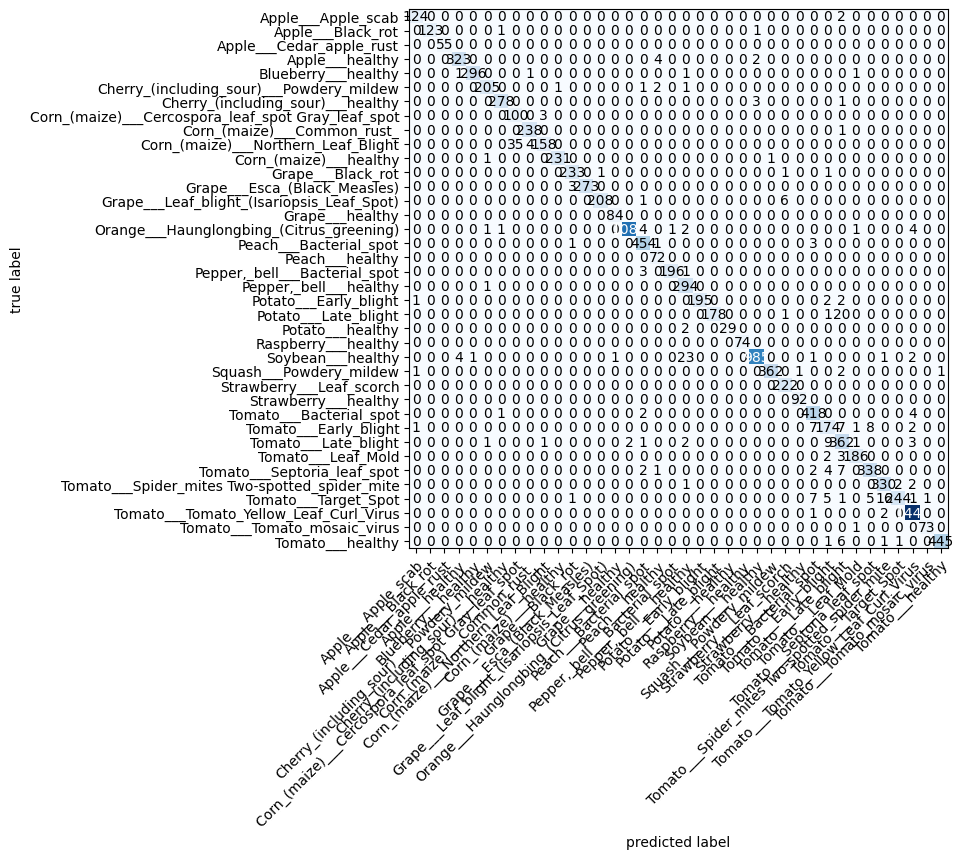

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor(test_data.targets))

# Plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [ ]:
f1_per_class = multiclass_f1_score(y_pred_tensor, y_true_tensor, num_classes=num_classes, average=None)

for i, score in enumerate(f1_per_class):
    print(f"{class_names[i]}: {score:.4f}")

Apple___Apple_scab: 0.9802
Apple___Black_rot: 0.9919
Apple___Cedar_apple_rust: 1.0000
Apple___healthy: 0.9833
Blueberry___healthy: 0.9916
Cherry_(including_sour)___Powdery_mildew: 0.9785
Cherry_(including_sour)___healthy: 0.9876
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 0.8403
Corn_(maize)___Common_rust_: 0.9876
Corn_(maize)___Northern_Leaf_Blight: 0.8802
Corn_(maize)___healthy: 0.9935
Grape___Black_rot: 0.9831
Grape___Esca_(Black_Measles): 0.9945
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 0.9811
Grape___healthy: 0.9941
Orange___Haunglongbing_(Citrus_greening): 0.9927
Peach___Bacterial_spot: 0.9795
Peach___healthy: 0.9474
Pepper,_bell___Bacterial_spot: 0.9874
Pepper,_bell___healthy: 0.9453
Potato___Early_blight: 0.9873
Potato___Late_blight: 0.9418
Potato___healthy: 0.9667
Raspberry___healthy: 1.0000
Soybean___healthy: 0.9806
Squash___Powdery_mildew: 0.9918
Strawberry___Leaf_scorch: 0.9823
Strawberry___healthy: 0.9946
Tomato___Bacterial_spot: 0.9676
Tomato___Early_blight: 0.8

In [ ]:
from pathlib import Path

# Create a model directory path
MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = 'disease_classifier_model3.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/disease_classifier_model3.pth


In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, # only works when model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc
          }

In [ ]:
# Create new instance of model
loaded_model_1 = DiseaseClassfier(input_shape=3,
                           output_shape=len(class_names)).to(device)

# Load the saved statedict of model 1
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


loaded_model_1.to(device)

DiseaseClassfier(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=128, out_features=38, bias=Tr

In [ ]:
# Evaluate loaded model

loaded_model_1_results = eval_model(model=loaded_model_1,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)


loaded_model_1_results

  0%|          | 0/359 [00:00<?, ?it/s]

{'model_name': 'DiseaseClassfier',
 'model_loss': 0.08365045487880707,
 'model_acc': 97.37987465181058}

To make a prediction on a custom image we had to:

Load image and turn it into a tensor
Make sure image was the same dtype as the model (torch.float32)
Make sure the image was the same shape as the data the model was trained on (3, 64, 64) with a batch size (1, 3, 64, 64)
Make sure image was on the right device

In [ ]:
import torchvision
import matplotlib.pyplot as plt
def pred_and_plot_custom_image(model: torch.nn.Module,
                image_path: str,
                class_names,
                transform = None,
                device = device):

  # 1. Transforming image
  # Load Image and divide pixel values by 255 to get them between [0, 1]
  target_img = torchvision.io.read_image(str(image_path)).type(torch.float) / 255

  # Ensure the image has 3 channels (RGB) by dropping the alpha channel if present
  if target_img.shape[0] == 4:
      target_img = target_img[:3, :, :]

  # Transform if necessary
  if transform:
    # transform = transforms.Compose([transforms.Resize(size=(64, 64))])
    target_img = transform(target_img)

  # 2. Getting Prediction
  model.to(device)
  model.eval()
  with torch.inference_mode():
    # Add extra dimension for batch size
   target_pred_logits = model(target_img.unsqueeze(dim=0).to(device))

  target_pred_probs = torch.softmax(target_pred_logits, dim=1)
  target_pred_labels = torch.argmax(target_pred_probs, dim=1)

  # 3. Plotting
  plt.imshow(target_img.squeeze().permute(1, 2, 0)) # remove batch dimension and change to (HWC)
  if class_names:
    title = f'Pred: {class_names[target_pred_labels.cpu()]} | Prob: {target_pred_probs.max().cpu():.3f}'
  else:
    title = f'Pred: {target_pred_labels} | Prob: {target_pred_probs.max().cpu():.3f}'
  plt.title(title)
  plt.axis(False)

In [ ]:
# Download custom image
import requests
from pathlib import Path

# Setup custom image path
custom_image_name = 'tomato-blight-leaf.png' # Ensure correct filename with extension
custom_image_path = data_path / custom_image_name

# Download image if it doesn't exist
if not custom_image_path.is_file():
  print(f'Downloading: {custom_image_path}...')
  # Corrected URL to directly access the raw image file
  request = requests.get('https://raw.githubusercontent.com/knair943/PlantGaurd/main/tomato-blight-leaf.png')
  with open(custom_image_path, 'wb') as f:
    f.write(request.content)
else:
  print('Already exists')

Already exists


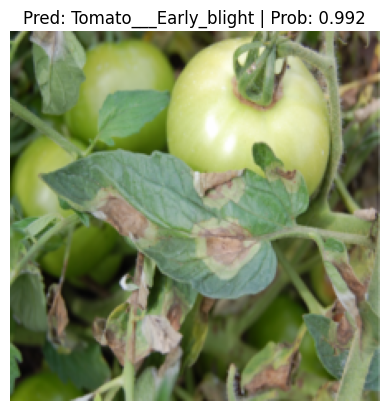

In [ ]:
pred_and_plot_custom_image(model=model_1,
            image_path=custom_image_path,
            class_names=class_names,
            transform=transforms.Compose([transforms.Resize(size=(224, 224))]))